# Text 2: Latent semantic indexing
**Internet Analytics - Lab 4**

---

**Group:** *J*

**Names:**

* *Kenza Driss*
* *Maximilien Hoffbeck*
* *Jaeyi Jeong*
* *Yoojin Kim*

---

#### Instructions

*This is a template for part 2 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

In [1]:
import pickle
import numpy as np
from scipy.sparse.linalg import svds

In [2]:
from utils import load_json, load_pkl

courses = load_json('data/courses.txt')
stopwords = load_pkl('data/stopwords.pkl')

X = load_pkl('X.pkl')
terms = load_pkl('terms.pkl')
doc_ids = load_pkl('doc_ids.pkl')

In [3]:
# For debugging
print(type(X))  
print("X shape:", X.shape)

<class 'scipy.sparse._csr.csr_matrix'>
X shape: (6842, 854)


## Exercise 4.4: Latent semantic indexing

In [4]:
k = 300
U, S, Vt = svds(X, k=k)

print("U shape:", U.shape)
print("S shape:", S.shape)
print("Vt shape:", Vt.shape)

U shape: (6842, 300)
S shape: (300,)
Vt shape: (300, 854)


##### 1. Describe the rows and columns of U and V, and the values of S.

- Matrix U represents the relationship between terms and latent concepts. Each row corresponds to a term (word), and each column indicates an underlying latent concept or "topic". The entries represent how strongly each term is associated with each concept. 
- Matrix V (the transpose of Vt) is a matrix where each row corresponds to a document (course), and each column indicates the document's alignment with each latent concept. This allows us to compare documents not only by word overlap but also semantic similarity.
- The diagonal matrix S contains the singular values, which represent the importance of each latent concept. Larger singular values correspond to more dominant topics in the corpus. In this code, S is stored as a vector, containing only the diagonal values.

##### 2. Print the top-20 singular values of X.

In [5]:
sorted_S = S[::-1]
print("Top 20 singular values:")
print(sorted_S[:20])

Top 20 singular values:
[39.01691747 24.19925082 23.39953197 21.77062461 21.38545563 21.09980768
 20.61094199 20.03532198 19.5805138  19.17960182 18.74129033 18.71581991
 18.1783779  18.11402992 17.97268614 17.82310125 17.73274442 17.62192124
 17.19686596 17.05772456]


These singular values represent the strength of the latent semantic dimensions in our term-document matrix X. High singular values correspond to dominant topics that are common across many documents and encapsulate the most informative and discriminative patterns in the data.

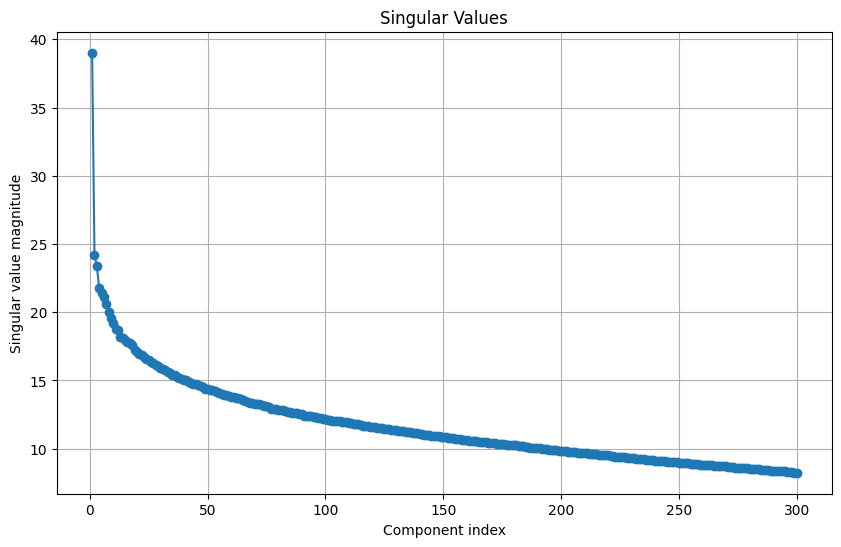

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_S)+1), sorted_S, marker='o')
plt.title('Singular Values')
plt.xlabel('Component index')
plt.ylabel('Singular value magnitude')
plt.grid(True)
plt.show()
plt.close()

To better understand the distribution of these singular values, we plotted their magnitudes against their component indices, as shown in the graph above. We observe a steep drop in magnitude after the first few components, followed by a gradual decline. The long tail of smaller singular values indicates more specialized or noisy information with a lower impact on the overall structure of the corpus. Therefore, analyzing the singular value distribution not only highlights the dominance of a few major themes but also justifies focusing on the top components when performing tasks such as semantic search or topic extraction. This approach reduces dimensionality while retaining most of the meaningful information.

## Exercise 4.5: Topic extraction

##### 1. Print the top-10 topics as a combination of 10 terms and 10 documents.

In [7]:
num_topics = 10
num_terms = 10
num_docs = 10

top_terms_indices = np.argsort(-np.abs(U), axis=0)[:num_terms]
top_docs_indices = np.argsort(-np.abs(Vt), axis=1)[:, :num_docs]

The top 10 topics were extracted from the term-document matrix using SVD low rank approximation. For each topic, we identified the 10 terms from matrix U, annd the 10 documents from matrix Vt with the highest absolute contributions. The absolute values captures the strength of the contribution regardless of direction, so we could focus on terms and documents that are most strongly related to the topic whether positively or negatively.

In [8]:
print("Top 10 topics")
for idx in range(num_topics):
    singular_val = sorted_S[idx]
    print(f"# Topic {idx + 1} | Singular value: {singular_val}")
    print("terms:   ", [terms[i] for i in top_terms_indices[:, idx]])
    print("doc_ids: ", [doc_ids[i] for i in top_docs_indices[idx, :]])

Top 10 topics
# Topic 1 | Singular value: 39.016917471066726
terms:    ['governance', 'sts', 'cftp', 'satcom', 'ee', 'animal', 'policy', 'hpc', 'mathematica', 'network']
doc_ids:  ['CS-413', 'ME-475', 'MGT-641(a)', 'MATH-634', 'ENG-603', 'BIO-689(b)', 'MGT-609', 'CH-492', 'MATH-454', 'FIN-601']
# Topic 2 | Singular value: 24.19925082087609
terms:    ['heat', 'cftp', 'lie', 'ecological', 'epitaxy', 'food', 'taste', 'additive', 'glass', 'wireless']
doc_ids:  ['ENV-422', 'BIO-482', 'ME-403', 'MATH-468', 'MATH-634', 'EE-207', 'ENG-603', 'CH-628', 'MICRO-560', 'BIO-636']
# Topic 3 | Singular value: 23.399531973736128
terms:    ['haptic', 'code', 'prothesis', 'rsa', 'food', 'thesis', 'reed', 'partition', 'epitaxy', 'minor']
doc_ids:  ['COM-102', 'MICRO-553', 'HUM-483', 'PHYS-403', 'HUM-432(a)', 'ENG-802', 'CH-242(a)', 'EE-724', 'BIOENG-433', 'ME-705']
# Topic 4 | Singular value: 21.770624613259454
terms:    ['animal', 'mathematica', 'biomaterials', 'microbial', 'food', 'slot', 'process', 'lu

##### 2. Give a label to each of them.

- Topic 1: Policy & Network Systems
- Topic 2: Thermal & Material Engineering
- Topic 3: Haptics & Cryptography
- Topic 4: Biomaterials & Immunology
- Topic 5: Rehabilitation & Computation
- Topic 6: Food Tech & VR
- Topic 7: Particle Physics & Biometric Systems
- Topic 8: Food Science & Cryptology
- Topic 9: Cryptography & Mathematical Modeling
- Topic 10: Biomaterials & Biomechanics

The extracted topics illustrate latent patterns in the course descriptions, but some combinations of terms appear less semantically coherent. This reflects the limitations of LSI in interpretability. Notably, certain dominant terms like 'food' appear across multiple topics. To enhance the interpretability, we could incorporate n-grams or probabilistic topic models such as LDA.

## Exercise 4.6: Document similarity search in concept-space

##### 1. Display the top five courses together with their similarity score for each query.

In [9]:
from numpy.linalg import norm

def lsi_similarity_term_to_docs(query, terms, U, S, Vt, top_k=5):
    if query not in terms:
        print(f"Query term '{query}' not found.")
        return
    
    term_idx = terms.index(query)
    u_t = U[term_idx, :]  
    sim_scores = []

    for d in range(Vt.shape[1]):
        v_d = Vt[:, d]
        numerator = np.dot(u_t * S, v_d)
        denominator = norm(u_t) * norm(S * v_d)
        similarity = numerator / denominator if denominator != 0 else 0.0
        sim_scores.append((similarity, d))

    # Sort by similarity
    sim_scores.sort(reverse=True)
    print(f"\nTop {top_k} courses for query: '{query}'")
    for score, idx in sim_scores[:top_k]:
        course_id = doc_ids[idx]
        course_name = next((c['name'] for c in courses if c['courseId'] == course_id), "Unknown")
        print(f"{course_id:10s}  {course_name:45s}  Similarity: {score:.4f}")

lsi_similarity_term_to_docs("markov", terms, U, S, Vt)
lsi_similarity_term_to_docs("facebook", terms, U, S, Vt)



Top 5 courses for query: 'markov'
MGT-484     Applied probability & stochastic processes     Similarity: 0.7644
EE-605      Statistical Sequence Processing                Similarity: 0.7236
MATH-332    Applied stochastic processes                   Similarity: 0.6719
COM-516     Markov chains and algorithmic applications     Similarity: 0.6712
EE-516      Data analysis and model classification         Similarity: 0.3069

Top 5 courses for query: 'facebook'
EE-727      Computational Social Media                     Similarity: 0.9308
EE-593      Social media                                   Similarity: 0.6475
HUM-432(a)  How people learn I                             Similarity: 0.4478
CS-622      Privacy Protection                             Similarity: 0.3669
HUM-432(b)  How people learn II                            Similarity: 0.3432


For the query "markov", the top-ranked courses include 'Applied probability & stochastic processes', 'Statistical Sequence Processing', and 'Applied stochastic processes'. These courses are highly relevant, though not all contain the exact term "markov." This indicates that LSI captures the underlying semantic relationship between the query and the courses, effectively identifying relevant content even when the explicit term is absent.

For the query "facebook," the top-ranked courses were highly relevant to the topic. Notably, 'Computational Social Media' achieved a similarity score over 0.9. Interestingly, additional courses such as 'How People Learn' and 'Privacy Protection' appeared in the top results. This suggests that LSI captures semantic connections to broader themes like social behavior and online privacy.

##### 2. Compare with the previous section.

The LSI based search demonstrates significant improvement over previous method by leveraging the latent semantic structure of the corpus. It successfully recognizes not only explicit term matches but also semantic proximity. This is especially evident for the "facebook" query, where LSI retrieved additional relevant courses such as 'How People Learn' that discuss relevant concepts. Moreover, this similarity search produced higher similarity scores for both queries compared to the previous one. It reflects that LSI enables to model deeper relationships between terms and documents.

## Exercise 4.7: Document-document similarity

##### 1. Write down the equation to efficiently compute the similarity between documents.

The similarity between two documents $d_i$ and $d_j$ can be computed using the cosine similarity formula.

$$
\text{sim}(d_i, d_j) = \frac{(S v_i)^T (S v_j)}{\| S v_i \| \| S v_j \|}
$$

- $v_i, v_j$: columns of $V^T$ corresponding to the documents i, j
- $S$: diagonal matrix of singular values earned by SVD decomposition
- $S v_i, S v_j$: scaled latent semantic vector of document $d_i, d_j$


##### 2. Print the top 5 classes most similar to COM-308.

In [10]:
def lsi_similarity_doc_to_docs(target_course_code, courses, Vt, S, top_k=5):
    try:
        target_idx = doc_ids.index(target_course_code)
    except ValueError:
        print(f"Course {target_course_code} not found.")
        return

    v_target = Vt[:, target_idx]
    sim_scores = []

    for i in range(Vt.shape[1]):
        if i == target_idx:
            continue  
        v_i = Vt[:, i]
        numerator = np.dot(S * v_target, S * v_i)
        denominator = norm(S * v_target) * norm(S * v_i)
        similarity = numerator / denominator if denominator != 0 else 0.0
        sim_scores.append((similarity, i))

    sim_scores.sort(reverse=True)
    print(f"\nTop {top_k} courses similar to {target_course_code}")
    for score, idx in sim_scores[:top_k]:
        course_id = doc_ids[idx]
        course_name = next((c['name'] for c in courses if c['courseId'] == course_id), "Unknown")
        print(f"{course_id:10s}  {course_name:45s}  Similarity: {score:.4f}")

lsi_similarity_doc_to_docs("COM-308", courses, Vt, S)



Top 5 courses similar to COM-308
CS-423      Distributed information systems                Similarity: 0.6244
CS-401      Applied data analysis                          Similarity: 0.4568
FIN-525     Financial big data                             Similarity: 0.4407
EE-558      A Network Tour of Data Science                 Similarity: 0.4145
EE-727      Computational Social Media                     Similarity: 0.4101


Unlike simple term matching, LSI captures hidden semantic relationships and enables the recommendation of relevant courses even if they do not explicitly mention the same keywords. This symmetric similarity can be precomputed for all course pairs to enable scalable course recommendation systems. The top-ranked courses are expected to cover topics such as data mining, data analytics, big data or social networks, which are intuitively close to the content of Internet Analytics course. 